In [400]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [401]:
from implementations import *
from helpers import *
from data_manager import *
from runners import *
from plot import *

In [402]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

Score: % 65.85600000000001
Score: % 68.2744
Score: % 69.97879999999999
Score: % 71.1312
Score: % 72.7368
Score: % 73.6696
Score: % 74.05080000000001
Score: % 74.34960000000001
Score: % 74.6428
Score: % 74.89519999999999
Score: % 75.02640000000001
Score: % 67.2284
Score: % 49.4144
Score: % 49.5284
Score: % 66.5364


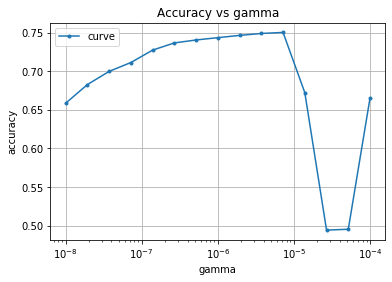

In [397]:
# Data processing -> part you can play with
My_options = ['nanmed', 'bound', 'std', 'prb']
y, tX = process_data(y, tX, My_options)

#Split data for learning and testing
ratio = 0.8
seed = 1
y_tr, x_tr, y_te, x_te = split_data(y, tX, ratio, seed)

# Run parameters -> part you can play with
# Every parameter needs to be as list (if np.array write inside brackets por favor)
degrees = []
gammas = [np.logspace(-8, -4, 15)]
lambdas = []
method = logistic_regression

# Gradient parameters, indicate if you are using a gradient method (True/False)
Grad_method = True
max_iter = 100
w_init = []

grad = [Grad_method, w_init, max_iter]

# Run-run-run
weights, losses = optimization(y_tr, x_tr, method, degrees, gammas, lambdas, grad)

# Plot-plot-plot
accuracy = np.zeros(len(weights))
for ind, w in enumerate(weights):
    accuracy[ind] = test_logistic_score(y, tX, w)
    
plotML_gamma(accuracy, gammas[0])

In [301]:
# Hum... je pense qu'on a un probleme avec build poly et least_squares

max_iter = 100
x = build_poly(tX, 3)
w_init = np.zeros(x.shape[1])
gamma = 1e-6

w, loss = least_squares_GD(y, x, w_init, max_iter, gamma)
print(w)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan]


In [404]:
def jet_ski(y, tX, methods, parameters):
    ratio = 0.8
    seed = 1
    
    pred = []
    Y =[]
    #tX = build_poly(tX,2)
    
    
    jets_y, jets_tX,_ = cat_variables(y, tX,ids)
    
    My_options = ['nanmed', 'bound', 'zerovar','std']
    
    for ind in range(len(jets_y)):
        jets_y[ind], jets_tX[ind] = process_data(jets_y[ind], jets_tX[ind], My_options)
        cross_terms_tx_train = build_cross_terms(jets_tX[ind])
        final_tX = np.c_[jets_tX[ind], cross_terms_tx_train]
        
        y_tr, x_tr, y_te, x_te = split_data(jets_y[ind], final_tX, ratio, seed)
       
        #w_initial = np.zeros(x_tr.shape[1])
        param = [y_tr, x_tr]
        P = param + parameters

        w,loss = test_methods(methods, P)
        
        #pred_train = predict(x_tr, w)
        pred_test = predict(x_te, w)
        print("index", ind)
        print("validation accuracy : ", np.sum(pred_test==y_te)/pred_test.shape[0])
        
        pred.append(pred_test)
        Y.append(y_te)
    
    pred =np.concatenate(pred, 0)
    Y = np.concatenate(Y,0)
    
    print("total accuracy :", np.sum(pred==Y)/pred.shape[0])
    
#max_iters = 5000
#gamma = 2.89e-10
gammas = np.logspace(-12, -8, 10)

   
def jet_ski(y, tX, methods, parameters):
    ratio = 0.8
    seed = 1
    
    pred = []
    Y =[]
    #tX = build_poly(tX,2)
    
    
    jets_y, jets_tX,_ = cat_variables(y, tX,ids)
    
    My_options = ['nanmed', 'bound', 'zerovar','std']
    
    for ind in range(len(jets_y)):
        jets_y[ind], jets_tX[ind] = process_data(jets_y[ind], jets_tX[ind], My_options)
        cross_terms_tx_train = build_cross_terms(jets_tX[ind])
        final_tX = np.c_[jets_tX[ind], cross_terms_tx_train]
        
        y_tr, x_tr, y_te, x_te = split_data(jets_y[ind], final_tX, ratio, seed)
       
        #w_initial = np.zeros(x_tr.shape[1])
        param = [y_tr, x_tr]
        P = param + parameters

        w,loss = test_methods(methods, P)
        
        #pred_train = predict(x_tr, w)
        pred_test = predict(x_te, w)
        print("index", ind)
        print("validation accuracy : ", np.sum(pred_test==y_te)/pred_test.shape[0])
        
        pred.append(pred_test)
        Y.append(y_te)
    
    pred =np.concatenate(pred, 0)
    Y = np.concatenate(Y,0)
    
    print("total accuracy :", np.sum(pred==Y)/pred.shape[0])
    
#max_iters = 5000
#gamma = 2.89e-10
gammas = np.logspace(-12, -8, 3)

   
jet_ski(y, tX, ridge_regression, parameters)
    

for gamma_ in gammas: 
    print("gamma = ", gamma_)
    parameters = [gamma_]
    jet_ski(y, tX, ridge_regression, parameters)
    

index 0
validation accuracy :  0.8444677976279837
index 1
validation accuracy :  0.7814172416016506
index 2
validation accuracy :  0.8220524017467249
index 3
validation accuracy :  0.8204376268892398
total accuracy : 0.8182636347273055
gamma =  1e-12
index 0
validation accuracy :  0.8444677976279837
index 1
validation accuracy :  0.7814172416016506
index 2
validation accuracy :  0.8220524017467249
index 3
validation accuracy :  0.8204376268892398
total accuracy : 0.8182636347273055
gamma =  1e-10
index 0
validation accuracy :  0.8444677976279837
index 1
validation accuracy :  0.7814172416016506
index 2
validation accuracy :  0.8220524017467249
index 3
validation accuracy :  0.8204376268892398
total accuracy : 0.8182636347273055
gamma =  1e-08
index 0
validation accuracy :  0.8444677976279837
index 1
validation accuracy :  0.7814172416016506
index 2
validation accuracy :  0.8220524017467249
index 3
validation accuracy :  0.8204376268892398
total accuracy : 0.8182636347273055


In [399]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [365]:
def jet_ski(y, tX,ids,y_test,tX_test,ids_test, methods, parameters):
    ratio = 0.8
    seed = 1
    
    pred = []
    id_t =[]
    Y =[]
    tX = build_poly(tX,2)
    tX_test = build_poly(tX_test,2)
    
    
    jets_y, jets_tX, _ = cat_variables(y, tX, ids)
    jets_y_test, jets_tX_test, id_test = cat_variables(y_test, tX_test, ids_test)
    
    
    My_options = ['nanmed', 'bound', 'zerovar','std']
    
    for ind in range(len(jets_y)):
        print('Analyzing jet {}'.format(ind))
        jets_y[ind], jets_tX[ind] = process_data(jets_y[ind], jets_tX[ind], My_options)
        jets_y_test[ind], jets_tX_test[ind] = process_data(jets_y_test[ind], jets_tX_test[ind], My_options)


        cross_terms_tx_train = build_cross_terms(jets_tX[ind])
        final_tX_train = np.c_[jets_tX[ind], cross_terms_tx_train]
        
        cross_terms_tx_test = build_cross_terms(jets_tX_test[ind])
        final_tX_test = np.c_[jets_tX_test[ind], cross_terms_tx_test]

        param = [jets_y[ind], final_tX_train]
        P = param + parameters

        w,loss = test_methods(methods, P)
        
        pred_test = predict(final_tX_test,w)
        
        pred.append(pred_test)
        id_t.append(id_test[ind])
        
        Y.append(jets_y_test[ind])

 
    
    pred =np.concatenate(pred, 0)
    id_t =np.concatenate(id_t,0)
    Y =np.concatenate(Y,0)

    print("total accuracy :", np.sum(pred==Y)/pred.shape[0])


    OUTPUT_PATH = "submissionfloflo.csv"    
    
    create_csv_submission(id_t, pred, OUTPUT_PATH)
#max_iters = 5000
gamma = 2.89e-10

   
parameters = [gamma]


jet_ski(y, tX,ids,y_test,tX_test,ids_test, ridge_regression, parameters)
    

Analyzing jet 0
Analyzing jet 1
Analyzing jet 2
Analyzing jet 3
total accuracy : 0.3039430661096231
